In [2]:
#Declaracion de bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar as cld
import seaborn as sns

In [3]:
#Lectura del archivo de texto
df0 = pd.read_csv('bahiakino.txt', skiprows=0, sep='\s+') 

In [4]:
#Conversion de los datos del archivo en un marco de datos
df=pd.DataFrame(df0)

In [5]:
#Conversion de la columna "Fecha" en una variable
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['FECHA'],1), dayfirst=True)

In [6]:
#Conversion de las columnas  "PRECIP", "EVAP", "TMAX", "TMIN" en variables numericas
cols = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [7]:
df.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [8]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,6619.000000,4721.000000,6485.00000,6486.000000
mean,0.358136,6.096420,27.11192,13.964030
std,2.788885,2.714726,5.78545,7.048581
min,0.000000,0.100000,10.50000,-4.000000
25%,0.000000,4.100000,22.00000,8.000000
50%,0.000000,6.000000,27.00000,12.500000
75%,0.000000,7.900000,32.00000,20.000000
max,70.000000,17.700000,48.50000,30.000000


In [9]:
#Creacion de variables de mes y año
df['MES'] = df['FECHA'].dt.month 
df['AÑO'] = df['FECHA'].dt.year
df['DIA'] = df['FECHA'].dt.day

In [10]:
df.head(),df.tail()

(       FECHA  PRECIP  EVAP  TMAX  TMIN  MES   AÑO  DIA
 0 1974-07-01     0.0   7.3  35.0  22.0    7  1974    1
 1 1974-07-02     0.0  10.5  34.0  22.5    7  1974    2
 2 1974-07-03     0.0  13.6  31.5  21.0    7  1974    3
 3 1974-07-04     0.0  10.7  41.0  28.0    7  1974    4
 4 1974-07-05     0.0  10.9  35.0  28.0    7  1974    5,
           FECHA  PRECIP  EVAP  TMAX  TMIN  MES   AÑO  DIA
 6630 2011-07-27     0.0   9.4  34.0  24.0    7  2011   27
 6631 2011-07-28     0.0   7.0  33.5  24.5    7  2011   28
 6632 2011-07-29     0.0   7.6  33.0  25.5    7  2011   29
 6633 2011-07-30     0.0   8.1  36.0  25.5    7  2011   30
 6634 2011-07-31     0.0   NaN   NaN  27.5    7  2011   31)

In [26]:
# Número de años distintos
NumA = len(df['AÑO'].unique())
print(NumA, "años de datos")

24 años de datos


In [12]:
#Loop para obtener datos por mes
Meses = [i + 1 for i in range(12)] 
PrecipMens = [df[df.MES==(i+1)].PRECIP.sum()/NumA for i in range (12)]
TMaxMens = [df[df.MES==(i+1)].TMAX.mean() for i in range (12)]
TMinMens = [df[df.MES==(i+1)].TMIN.mean() for i in range (12)]

In [13]:
#DataFrame para los datos mensuales
datos_mensual = {'MES': Meses, 'PrecipMens': PrecipMens, 'TMaxMens': TMaxMens, 'TMinMens': TMinMens}
df_mensual = pd.DataFrame(data=datos_mensual)
df_mensual

,MES,PrecipMens,TMaxMens,TMinMens
0,1,7.508333,19.702471,6.594286
1,2,5.166667,21.462598,7.166864
2,3,1.750000,22.931542,8.585492
3,4,0.666667,25.518492,10.700719
4,5,0.291667,28.093137,13.230392
5,6,1.208333,31.985887,18.229839
6,7,13.345833,33.007785,23.729706
7,8,27.808333,33.827075,23.788538
8,9,16.179167,33.129529,21.980000
9,10,7.983333,29.516608,15.895288


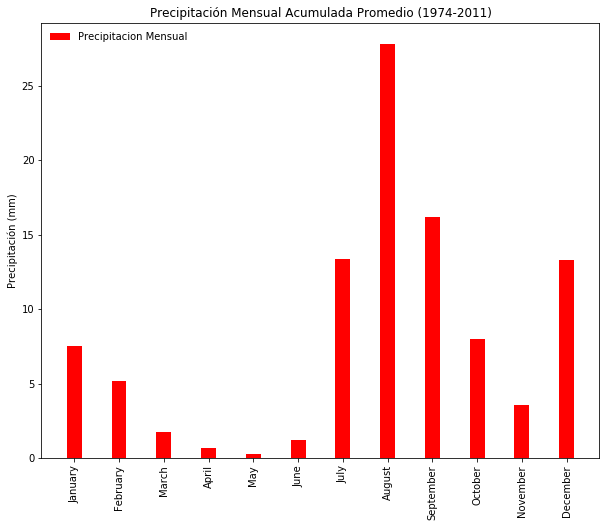

In [35]:
#Grafica de barras para las precipitaciones mensuales promedio acumuladas
Nombre=cld.month_name[1:13]
width = np.min(np.diff(Meses))/3

plt.figure(figsize=[10,8])
plt.bar(Meses-width, PrecipMens,width, color='R')
plt.xticks(Meses-width, Nombre, color = 'k', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Mensual Acumulada Promedio (1974-2011)')
plt.legend(["Precipitacion Mensual"],frameon=False,loc='upper left')
plt.show()

In [15]:
#Loop para obtener datos por año
Años = [i + 1 for i in range(1973,2011)] 
PrecipAn = [df[df.AÑO==(i+1)].PRECIP.mean() for i in range (1973,2011)]
TMaxAn = [df[df.AÑO==(i+1)].TMAX.mean() for i in range (1973,2011)]
TMinAn = [df[df.AÑO==(i+1)].TMIN.mean() for i in range (1973,2011)]

In [16]:
#DataFrame para los datos anuales
datos_anual = {'AÑOS': Años, 'PrecipAn': PrecipAn, 'TMaxAn': TMaxAn, 'TMinAn': TMinAn}
df_anual = pd.DataFrame(data=datos_anual)
df_anual

,AÑOS,PrecipAn,TMaxAn,TMinAn
0,1974,0.488043,29.763587,17.084239
1,1975,0.153151,27.878356,11.665753
2,1976,0.292077,29.464208,11.624590
3,1977,0.286849,27.165753,14.726301
4,1978,0.222222,27.763158,13.870044
5,1979,0.352459,26.723214,13.031250
6,1980,0.189891,27.898907,15.159836
7,1981,0.249315,26.642466,14.782192
8,1982,0.420548,26.102210,14.317680
9,1983,0.641317,26.495509,13.706587


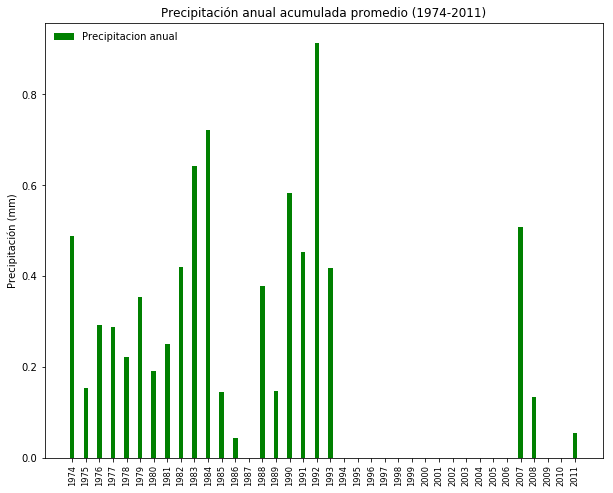

In [33]:
#Grafica de barras para la precipitacion anual promedio acumulada
width = np.min(np.diff(Años))/3

plt.figure(figsize=[10,8])
plt.bar(Años-width, PrecipAn,width, color='g')
plt.xticks(Años-width, Años, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación anual acumulada promedio (1974-2011)')
plt.legend(["Precipitacion anual"],frameon=False,loc='best')
plt.show()

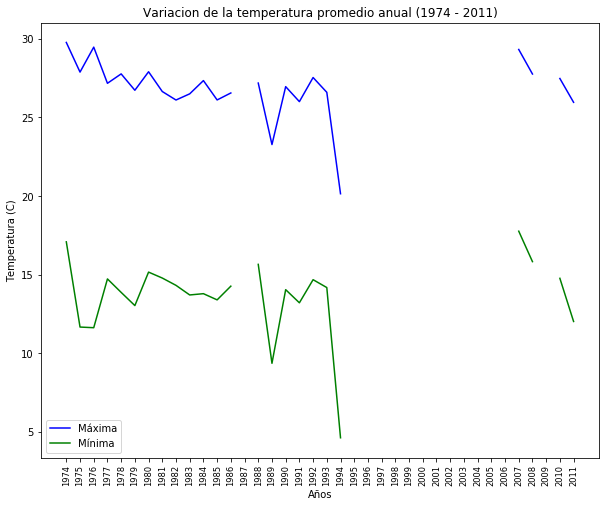

In [36]:
#Realizamos una gráfica que demuestre la temperatura máxima y mínima promedio a través del tiempo
X = Años
N = np.arange(len(X)) #Longitud del arreglo de datos
Y1 = TMaxAn
Y2 = TMinAn

plt.figure(figsize=[10,8])
plt.plot(Y1, label="Máxima", color = 'b')
plt.plot(Y2, label="Mínima", color = 'g')
plt.xticks(N, X, size = 'small',color = 'k',rotation = 90)
plt.xlabel("Años")
plt.ylabel("Temperatura (C)")
plt.legend()
plt.title('Variacion de la temperatura promedio anual (1974 - 2011)')
plt.show()

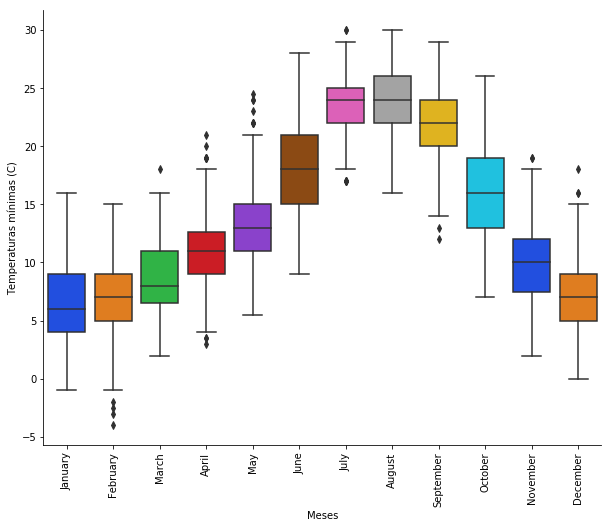

In [38]:
Nombre=cld.month_name[1:13]

plt.figure(figsize=[10,8])
ax = sns.boxplot(x="MES", y="TMIN", data=df, palette="bright")
ax.set_xticklabels(Nombre,rotation=90)
ax.set(xlabel='Meses', ylabel='Temperaturas mínimas (C)')
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.show()

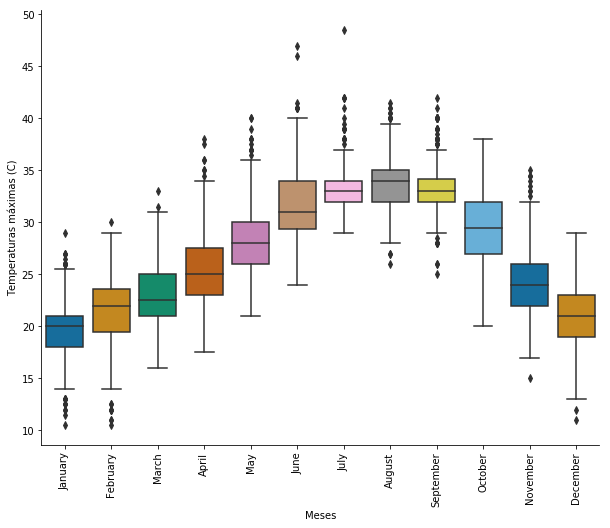

In [39]:
Nombre=cld.month_name[1:13]

plt.figure(figsize=[10,8])
ax = sns.boxplot(x="MES", y="TMAX", data=df, palette="colorblind")
ax.set_xticklabels(Nombre,rotation=90)
ax.set(xlabel='Meses', ylabel='Temperaturas máximas (C)')
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.show()

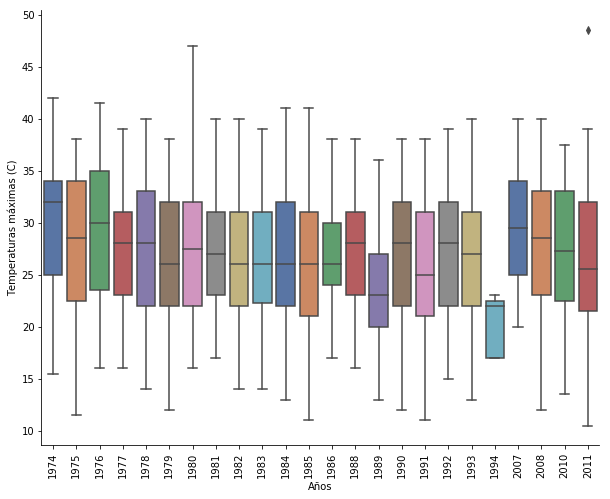

In [40]:
plt.figure(figsize=[10,8])
ax = sns.boxplot(x="AÑO", y="TMAX", data=df, palette="deep")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.tick_params(labelsize=10)
ax.set(xlabel='Años', ylabel='Temperaturas máximas (C)')
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.show()

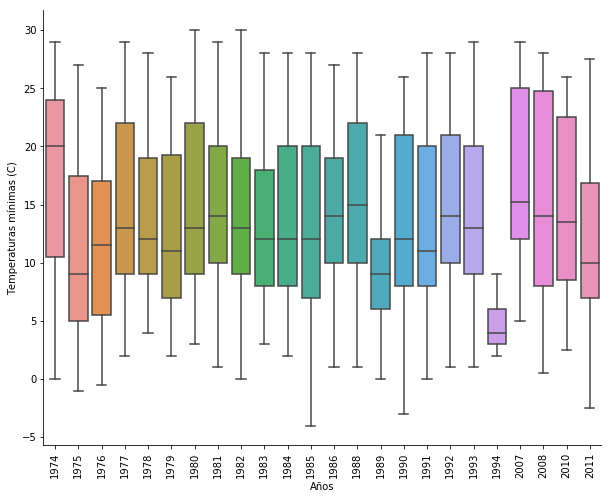

In [41]:
plt.figure(figsize=[10,8])
ax = sns.boxplot(x="AÑO", y="TMIN", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.tick_params(labelsize=10)
ax.set(xlabel='Años', ylabel='Temperaturas mínimas (C)')
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.show()